In [23]:
%matplotlib inline
import numpy as np
import matplotlib
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import stats
sns.set(style="whitegrid", color_codes=True)
plt.rcParams['figure.figsize'] = (12, 6)

In [4]:
ndvi = pd.read_csv("../data/NDVI/Orange_NDVI.csv", header=None)
spad = pd.read_csv("../data/Chlorophyll/Orange_Chlorophyll.csv", header=None)

In [7]:
ndvi

,0,1,2,3,4,5,6,7
0,0.906996,0.912257,0.892744,0.899565,0.911893,0.855733,0.920797,0.897833
1,0.890002,0.829614,0.800241,0.883612,0.795247,0.499829,0.869014,0.742279
2,0.746491,0.814974,0.892490,0.825297,0.849759,0.769442,0.895997,0.823675
3,0.868104,0.892306,0.872143,0.851512,0.871616,0.886104,0.901130,0.821213
4,0.658570,0.815792,0.823126,0.856335,0.792821,0.709106,0.823351,0.761536
5,0.871359,0.840916,0.836559,0.856965,0.751258,0.818247,0.787554,0.783491
6,0.778454,0.804447,0.785957,0.845633,0.800315,0.796938,0.863061,0.594488
7,0.782452,0.770871,0.869239,0.856583,0.721181,0.796343,0.823455,0.740690
8,0.843522,0.765611,0.790544,0.804250,0.722909,0.877346,0.836316,0.781098


In [9]:
spad = spad[:9]
spad

,0,1,2,3,4,5,6,7
0,70.860000,56.610000,59.05,51.80,52.590000,41.10,45.560000,57.460000
1,46.670000,41.220000,55.76,49.88,61.000000,50.64,39.930000,49.560000
2,57.690909,48.054545,44.44,47.67,40.700000,61.26,47.340000,56.150000
3,36.290000,53.600000,43.26,50.51,58.890000,54.58,38.320000,66.290000
4,48.280000,56.970000,30.93,31.77,43.450000,63.44,43.620000,44.710000
5,48.860000,51.940000,42.05,54.48,47.627273,45.07,35.228571,44.440000
6,41.840000,54.830000,43.06,39.66,38.000000,35.37,39.580000,31.590000
7,48.000000,43.670000,41.87,38.67,55.790000,51.60,43.270000,45.433333
8,50.590000,40.870000,42.53,64.83,41.270000,32.84,34.410000,45.120000


In [12]:
ndvi = ndvi.as_matrix().flatten()
spad = spad.as_matrix().flatten()

In [31]:
stats.pearsonr(spad, ndvi)

(0.048378730256680658, 0.68653695879351639)

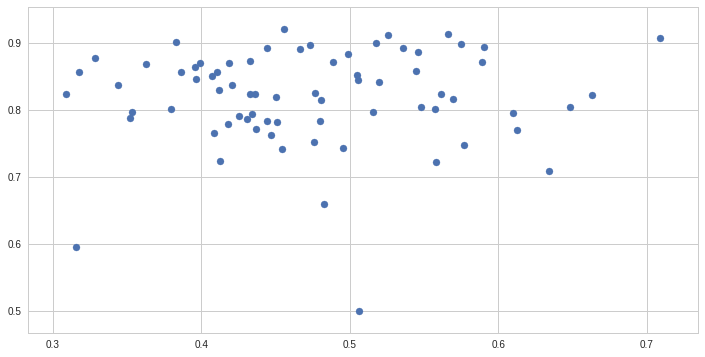

In [29]:
plt.scatter(spad, ndvi)